In [1]:
from qiskit import *
%matplotlib inline
import math
import numpy as np
from IPython.display import display, Markdown, Latex

In [2]:
def envio(self, sub_q) :
    sub_circ = QuantumCircuit(sub_q, name = 'Canal Cuantico')
    
    sub_circ.id(0)

    sub_inst = sub_circ.to_instruction()
    self.append(sub_inst,sub_q)

In [3]:
def print_ind(Alicia_bases,Bob_bases,resA,resB):
    head="|   | Base | Resultado | \n"
    sep="|:-:|:-:|:-:| \n"
    Ali="| Alicia | <span style=\"color:red\"> **"+ Alicia_bases+"**</span> | <span style=\"color:blue\">**" +str(resA)+"**</span>  | \n" 
    Bob="| Bob | <span style=\"color:red\"> **"+Bob_bases+"**</span> | <span style=\"color:blue\">**"+str(resB)+"**</span>  | \n" 

    output=head+sep+Ali+Bob
    display(Markdown(output))    

In [4]:
def print_llarg(Alicia_bases,Bob_bases,resA,resB):
    n=len(Alicia_bases)
    head="|   |" 
    sep="|:-:|"
    Ali="| Bases Alicia |"
    res_Ali="| Resultados Alicia |"
    Bob="| Bases Bob |"
    res_Bob="| Resultados Bob |"
    for i in range(n):
        head = head + str(i+1) + " |"
        sep=sep+":-:|"
        Ali=Ali+"<span style=\"color:red\"> **"+ Alicia_bases[i]+"**</span> |"
        res_Ali=res_Ali + "<span style=\"color:blue\">**" +str(resA[i])+"**</span>  | " 
        Bob=Bob+"<span style=\"color:red\"> **"+Bob_bases[i]+"**</span> |"
        res_Bob=res_Bob+"<span style=\"color:blue\">**"+str(resB[i])+"**</span> | " 
    head=head + "\n"
    sep=sep + "\n"
    Ali=Ali + "\n"
    res_Ali = res_Ali + "\n"
    Bob = Bob + "\n"
    res_Bob = res_Bob  + "\n"
    output=head+sep+Ali+res_Ali+Bob+res_Bob
    display(Markdown(output))    

In [5]:
def print_clave_secreta(Alicia_bases,Bob_bases,resA,resB):
    n=len(Alicia_bases)
    head="|   |" 
    sep="|:-:|"
    Ali="| Bases Alicia |"
    res_Ali="| Resultados Alicia |"
    Bob="| Bases Bob |"
    res_Bob="| Resultados Bob |"
    C_verd="<span style=\"color:green\"> **"
    C_black="<span style=\"color:black\"> ~~"
    for i in range(n):
        head = head + str(i+1) + " |"
        sep=sep+":-:|"
        Ali=Ali+"<span style=\"color:red\"> **"+ Alicia_bases[i]+"**</span> |"
        Bob=Bob+"<span style=\"color:red\"> **"+Bob_bases[i]+"**</span> |"
        if (Alicia_bases[i] == Bob_bases[i]):
            res_Bob=res_Bob+C_verd+str(resB[i])+"**</span> | " 
            res_Ali=res_Ali + C_verd +str(resA[i])+"**</span>  | " 
        else:
            res_Bob=res_Bob+C_black+str(resB[i])+"~~</span> | " 
            res_Ali=res_Ali + C_black +str(resA[i])+"~~</span>  | " 
    head=head + "\n"
    sep=sep + "\n"
    Ali=Ali + "\n"
    res_Ali = res_Ali + "\n"
    Bob = Bob + "\n"
    res_Bob = res_Bob  + "\n"
    output=head+sep+Ali+res_Ali+Bob+res_Bob
    display(Markdown(output))  

In [6]:
def print_singular_A(bases,res):
    n=len(bases)
    head="|   |" 
    sep="|:-:|"
    Ali="| Bases Alicia |"
    res_Ali="| Resultados Alicia |"
    for i in range(n):
        head = head + str(i+1) + " |"
        sep=sep+":-:|"
        Ali=Ali+"<span style=\"color:red\"> **"+ bases[i]+"**</span> |"
        res_Ali=res_Ali + "<span style=\"color:blue\">**" +str(res[i])+"**</span>  | " 
    head=head + "\n"
    sep=sep + "\n"
    Ali=Ali + "\n"
    res_Ali = res_Ali + "\n"
    stil="<style> table, th, td {padding: 10px; border: 1px solid black; border-collapse: collapse; } </style>\n"
    
    output=stil+head+sep+Ali+res_Ali
    display(Markdown(output))

In [7]:
def print_singular_B(bases,res):
    n=len(bases)
    head="|   |" 
    sep="|:-:|"
    Ali="| Bases Bob |"
    res_Ali="| Resultados Bob |"
    for i in range(n):
        head = head + str(i+1) + " |"
        sep=sep+":-:|"
        Ali=Ali+"<span style=\"color:red\"> **"+ bases[i]+"**</span> |"
        res_Ali=res_Ali + "<span style=\"color:blue\">**" +str(res[i])+"**</span>  | " 
    head=head + "\n"
    sep=sep + "\n"
    Ali=Ali + "\n"
    res_Ali = res_Ali + "\n"
    stil="<style> table, th, td {padding: 10px; border: 1px solid black; border-collapse: collapse; } </style>\n"
    
    output=stil+head+sep+Ali+res_Ali
    display(Markdown(output))

In [8]:
def circuit_A(Alicia_bases):
    qrA = QuantumRegister(1, 'qubit_A')
    qrB = QuantumRegister(1,'qubit_B')
    cr = ClassicalRegister(2,'m')

    cra = ClassicalRegister(1,'resultado_A')
    crb = ClassicalRegister(1,'resultado_B')



    circuit = QuantumCircuit(qrA,qrB,cra, crb)

    #generem estat entrellaçat

    circuit.barrier()
    circuit.h(0)
    circuit.cx(0,1)

    #ALICIA
    if (Alicia_bases=='Z'):
      circuit.measure(qrA[0],cra)
    else:
      circuit.h(0)
      circuit.measure(qrA[0],cra)
      circuit.h(0)

    circuit.barrier()
    envio(circuit,qrB[0:1])
    return circuit

In [9]:
def circuit_B(Bob_bases,circuit):
    circuit.barrier()
    #BOB
    if (Bob_bases[0]=='Z'):
      circuit.measure(1,1)
    else:
      circuit.h(1)
      circuit.measure(1,1)
      circuit.h(1)

    circuit.barrier()
    return circuit

In [10]:
def resultats_ind(circuit):
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend = simulator, shots= 1).result()
    counts = result.get_counts()
    key = [k for k, v in counts.items() if v == 1][0]
    resA = int(key[0])
    resB = int(key[2])
    return resA, resB

In [11]:
def resultats_llarga(Alicia_bases,Bob_bases):
    if len(Alicia_bases)!=len(Bob_bases):
        print("No tenemos el mismo numero de bases")
    else:
        resA=[]
        resB=[]
        for k in range(len(Alicia_bases)):
            qrA = QuantumRegister(1, 'qubit_A')
            qrB = QuantumRegister(1,'qubit_B')

            cra = ClassicalRegister(1,'resultado_A')
            crb = ClassicalRegister(1,'resultado_B')

            circuit = QuantumCircuit(qrA,qrB,cra, crb)
            #generem estat entrellaçat
            circuit.h(0)
            circuit.cx(0,1)
            #ALICIA
            if (Alicia_bases[k]=='Z'):
              circuit.measure(qrA[0],cra)
            else:
              circuit.h(0)
              circuit.measure(qrA[0],cra)
              circuit.h(0)
            #BOB
            if (Bob_bases[k]=='Z'):
              circuit.measure(qrB[0],crb)
            else:
              circuit.h(1)
              circuit.measure(qrB[0],crb)
              circuit.h(1)
            simulator = Aer.get_backend('qasm_simulator')
            result = execute(circuit, backend = simulator, shots= 1).result()
            counts = result.get_counts()
            key = [k for k, v in counts.items() if v == 1][0]
            resA.append(int(key[0]))
            resB.append(int(key[2]))
    return resA, resB

# Demo Paso a Paso

### Seccion inputs y circuitos



In [12]:
#Inputs:
Alicia_bases="Z"

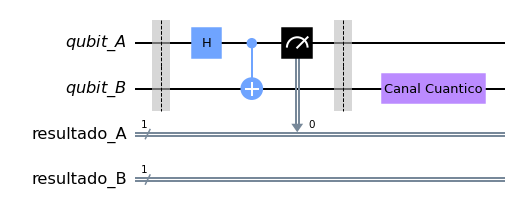

In [13]:
circuit=circuit_A(Alicia_bases)
circuit.draw(output="mpl")

In [14]:
#Inputs B
Bob_bases="X"

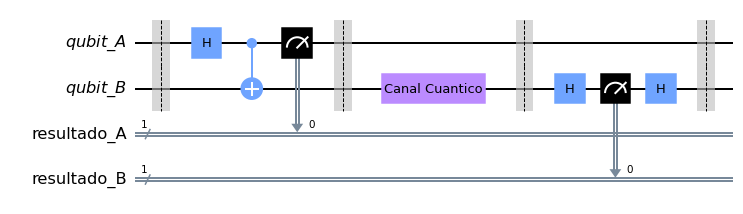

In [15]:
circuit = circuit_B(Bob_bases,circuit)
circuit.draw(output='mpl')

### Sección Resultados


In [16]:
resA, resB = resultats_ind(circuit)
print_ind(Alicia_bases,Bob_bases,resA,resB)

|   | Base | Resultado | 
|:-:|:-:|:-:| 
| Alicia | <span style="color:red"> **Z**</span> | <span style="color:blue">**0**</span>  | 
| Bob | <span style="color:red"> **X**</span> | <span style="color:blue">**0**</span>  | 


# Demo cadena intermedia

In [20]:
Alicia_bases="XXZZ"
Bob_bases="XXZX"

In [21]:
resA, resB = resultats_llarga(Alicia_bases,Bob_bases)
print_clave_secreta(Alicia_bases,Bob_bases,resA,resB)

|   |1 |2 |3 |4 |
|:-:|:-:|:-:|:-:|:-:|
| Bases Alicia |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **Z**</span> |
| Resultados Alicia |<span style="color:green"> **1**</span>  | <span style="color:green"> **0**</span>  | <span style="color:green"> **0**</span>  | <span style="color:black"> ~~1~~</span>  | 
| Bases Bob |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **X**</span> |
| Resultados Bob |<span style="color:green"> **1**</span> | <span style="color:green"> **0**</span> | <span style="color:green"> **0**</span> | <span style="color:black"> ~~0~~</span> | 


# Demostracion Publico

## Seccion Alicia

In [36]:
Alicia_bases="XXXXZZZZXXXZ"

In [38]:
resAL, resBL = resultats_llarga(Alicia_bases,Bob_bases)

In [39]:
print_singular_A(Alicia_bases,resAL)

<style> table, th, td {padding: 10px; border: 1px solid black; border-collapse: collapse; } </style>
|   |1 |2 |3 |4 |5 |6 |7 |8 |9 |10 |11 |12 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Bases Alicia |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **Z**</span> |
| Resultados Alicia |<span style="color:blue">**0**</span>  | <span style="color:blue">**1**</span>  | <span style="color:blue">**1**</span>  | <span style="color:blue">**1**</span>  | <span style="color:blue">**0**</span>  | <span style="color:blue">**1**</span>  | <span style="color:blue">**0**</span>  | <span style="color:blue">**0**</span>  | <span style="color:blue">**1**</span>  | <span style="color:blue">**1**</span>  | <span style="color:blue">**0**</span>  | <span style="color:blue">**0**</span>  | 


![PIPE](quantumchannel.png)

## Seccion Bob

In [37]:
Bob_bases="XZZZZXXZXXXX"

In [40]:
print_singular_B(Bob_bases,resBL)

<style> table, th, td {padding: 10px; border: 1px solid black; border-collapse: collapse; } </style>
|   |1 |2 |3 |4 |5 |6 |7 |8 |9 |10 |11 |12 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Bases Bob |<span style="color:red"> **X**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |
| Resultados Bob |<span style="color:blue">**0**</span>  | <span style="color:blue">**0**</span>  | <span style="color:blue">**1**</span>  | <span style="color:blue">**1**</span>  | <span style="color:blue">**0**</span>  | <span style="color:blue">**1**</span>  | <span style="color:blue">**0**</span>  | <span style="color:blue">**0**</span>  | <span style="color:blue">**1**</span>  | <span style="color:blue">**1**</span>  | <span style="color:blue">**0**</span>  | <span style="color:blue">**0**</span>  | 


# Comprobando clave secreta

In [41]:
print_clave_secreta(Alicia_bases,Bob_bases,resAL,resBL)

|   |1 |2 |3 |4 |5 |6 |7 |8 |9 |10 |11 |12 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Bases Alicia |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **Z**</span> |
| Resultados Alicia |<span style="color:green"> **0**</span>  | <span style="color:black"> ~~1~~</span>  | <span style="color:black"> ~~1~~</span>  | <span style="color:black"> ~~1~~</span>  | <span style="color:green"> **0**</span>  | <span style="color:black"> ~~1~~</span>  | <span style="color:black"> ~~0~~</span>  | <span style="color:green"> **0**</span>  | <span style="color:green"> **1**</span>  | <span style="color:green"> **1**</span>  | <span style="color:green"> **0**</span>  | <span style="color:black"> ~~0~~</span>  | 
| Bases Bob |<span style="color:red"> **X**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **Z**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |<span style="color:red"> **X**</span> |
| Resultados Bob |<span style="color:green"> **0**</span> | <span style="color:black"> ~~0~~</span> | <span style="color:black"> ~~1~~</span> | <span style="color:black"> ~~1~~</span> | <span style="color:green"> **0**</span> | <span style="color:black"> ~~1~~</span> | <span style="color:black"> ~~0~~</span> | <span style="color:green"> **0**</span> | <span style="color:green"> **1**</span> | <span style="color:green"> **1**</span> | <span style="color:green"> **0**</span> | <span style="color:black"> ~~0~~</span> | 


In [42]:
clave=[]
for k in range(len(Alicia_bases)):
    if Alicia_bases[k]==Bob_bases[k]:
        clave.append(resAL[k])
print("La clave secreta compartida es:",clave)

La clave secreta compartida es: [0, 0, 0, 1, 1, 0]
